# Radioactive Counting Experiment: 100 points 10 second

## Load required libraries

In [1]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
# For plotting
import matplotlib.pyplot as plt

from scipy.special import factorial

### Software Setup Parameter

In [2]:
# numbber of points
m = 100

# number of length of counting time
t_length = 10

## Load data for case without paper and with paper

In [3]:
t1, R1 = np.genfromtxt(f"data/2020-09-29-{m}pts{t_length}sec.csv", delimiter=',', unpack=True)
print("t1 = ", t1)
print("R1 = ", R1)
print()

t2, R2 = np.genfromtxt(f'data/2020-09-29-{m}pts{t_length}sec_withPaper.csv', delimiter=',', unpack=True)
print("t2 = ", t2)
print("R2 = ", R2)

t1 =  [  0.        10.000437  20.000257  30.000764  40.001004  50.000811
  60.00064   70.003062  80.000965  90.000702 100.001049 110.002527
 120.002343 130.002818 140.004212 150.002985 160.002068 170.002885
 180.004011 190.002898 200.002863 210.005322 220.004036 230.004616
 240.003531 250.003569 260.005027 270.003934 280.004636 290.004295
 300.005147 310.00519  320.004375 330.006258 340.004854 350.006169
 360.005401 370.006792 380.008899 390.006859 400.006477 410.00697
 420.006188 430.007523 440.008098 450.007762 460.008011 470.008127
 480.008617 490.007168 500.008698 510.008528 520.00881  530.009005
 540.009249 550.008876 560.009302 570.009474 580.00882  590.014187
 600.010064 610.009304 620.009736 630.010545 640.010548 650.011106
 660.01081  670.011987 680.01115  690.011002 700.011901 710.013009
 720.011809 730.010691 740.012036 750.012119 760.01475  770.012532
 780.012659 790.01272  800.01264  810.013343 820.01269  830.013042
 840.013706 850.013729 860.01477  870.014222 880.014471 8

## Analysis Computation

In [4]:
# now check that it worked
mean1 = np.mean(R1)
stdev1 = np.std(R1, ddof=1)
print('Without paper: mean : ' + str(np.around(mean1, decimals=2)) + 
      ', standard devation: ' + str(np.around(stdev1, decimals=2)))
print()

# now check that it worked
mean2 = np.mean(R2)
stdev2 = np.std(R2, ddof=1)
print('With paper: mean: ' + str(np.around(mean2, decimals=2)) + 
      ', standard devation: ' + str(np.around(stdev2, decimals=2)))
print()

# find range of counts that includes 68 counts from the mean for R1
counts = 0
deltaRange = 0
while(counts <= 68):
    maxRange = int(mean1) + deltaRange
    minRange = int(mean1) - deltaRange
    deltaRange +=0.1
    counts = R1[np.logical_and(R1 > minRange, R1 < maxRange)].size

print(f"R1: Manual Counting of range (<=68 counts); minRange = {minRange+1:.3}, maxRange = {maxRange-1:.3}, counts = {R1[np.logical_and(R1 > minRange+1, R1 < maxRange-1)].size}")
print(f"R1: Using std dev for range (68 %); minRange = {mean1 - stdev1:.3}, maxRange = {mean1 + stdev1:.3}, counts = {R1[np.logical_and(R1 > mean1 - stdev1, R1 < mean1 + stdev1)].size}")

# find range of counts that includes 68 counts from the mean for R2
counts = 0
deltaRange = 0
while(counts <= 68):
    maxRange = int(mean2) + deltaRange
    minRange = int(mean2) - deltaRange
    deltaRange +=0.1
    counts = R1[np.logical_and(R2 > minRange, R2 < maxRange)].size
print(f"R2: Manual Counting of range (<=68 counts); minRange = {minRange+1:.3}, maxRange = {maxRange-1:.3}, counts = {R2[np.logical_and(R2 > minRange+1, R2 < maxRange-1)].size}")
print(f"R2: Using std dev for range (68 %); minRange = {mean2 - stdev2:.3}, maxRange = {mean2 + stdev2:.3}, counts = {R2[np.logical_and(R2 > mean2 - stdev2, R2 < mean2 + stdev2)].size}")
print()

print("alpha1 = ", stdev1 / np.sqrt(100))
print("alpha2 = ", stdev2 / np.sqrt(100))

Without paper: mean : 66.57, standard devation: 8.11

With paper: mean: 62.84, standard devation: 9.78

R1: Manual Counting of range (<=68 counts); minRange = 58.9, maxRange = 73.1, counts = 65
R1: Using std dev for range (68 %); minRange = 58.5, maxRange = 74.7, counts = 66
R2: Manual Counting of range (<=68 counts); minRange = 52.9, maxRange = 71.1, counts = 68
R2: Using std dev for range (68 %); minRange = 53.1, maxRange = 72.6, counts = 69

alpha1 =  0.8111912925637904
alpha2 =  0.9784258641906252


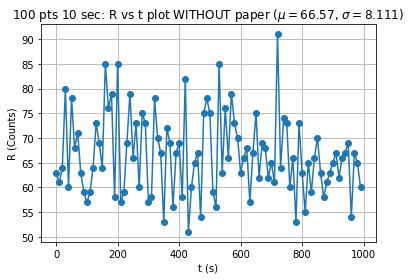

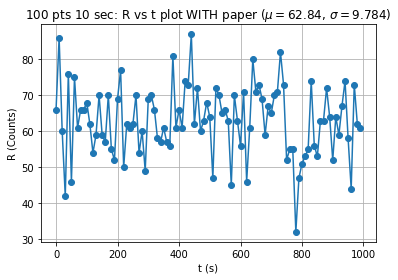

In [5]:
# and plot the data to have a look
plt.plot(t1,R1, "-o")
plt.title(f'{m} pts {t_length} sec: R vs t plot WITHOUT paper (' + r'$\mu=$' + str(mean1)[:5] + ', ' + r'$\sigma=$' + str(stdev1)[:5] + ')')
plt.xlabel('t (s)')
plt.ylabel('R (Counts)')
plt.grid(which='major', axis='both')
plt.show()

# and plot the data to have a look
plt.plot(t2,R2, "-o")
plt.title(f'{m} pts {t_length} sec: R vs t plot WITH paper (' + r'$\mu=$' + str(mean2)[:5] + ', ' + r'$\sigma=$' + str(stdev2)[:5] + ')')
plt.xlabel('t (s)')
plt.ylabel('R (Counts)')
plt.grid(which='major', axis='both')
plt.show()

## Plot the histogram

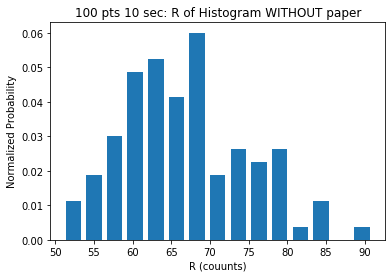

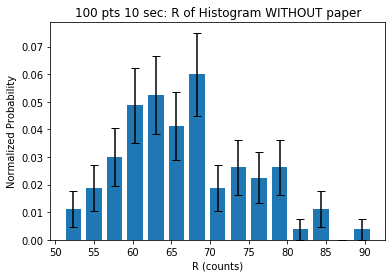

In [19]:
# without paper
# plot histogram
offset = 2
#bins = np.arange(np.min(R1) - offset, np.max(R1) + offset) - 0.5
bins = 15
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75)
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper')
plt.xlabel('R (couunts)')
plt.ylabel('Normalized Probability')
plt.show()

# add the error bars
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75)
counts_err = np.sqrt(counts) / np.sqrt(t1.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()


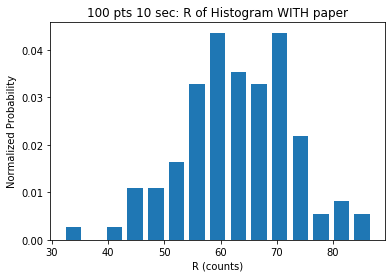

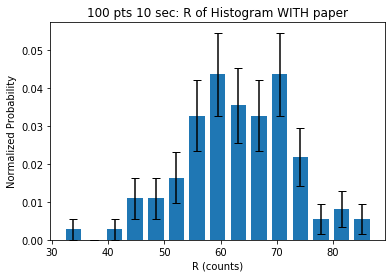

In [18]:
# with Paper

# plot histogram
offset = 2
#bins = np.arange(np.min(R2) - offset, np.max(R2) + offset) - 0.5
bins = 15
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75)
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()

# add the error bars
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75)
counts_err = np.sqrt(counts) / np.sqrt(t2.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.show()

## Poisson Model

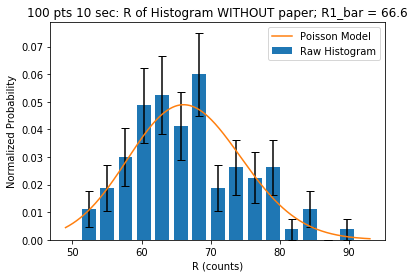

In [21]:
# without paper
# plot histogram
offset = 2
#bins = np.arange(np.min(R1) - offset, np.max(R1) + offset) - 0.5
bins = 15

# add the error bars
counts, bins, patches = plt.hist(R1, bins=bins, density=True, rwidth=0.75, label="Raw Histogram")
counts_err = np.sqrt(counts) / np.sqrt(t1.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

x_n_dist = np.linspace(np.min(R1) - offset, np.max(R1) + offset, 1000)
#pdf = norm.pdf(x_n_dist, loc=mean1, scale=stdev1) # this is for gaussian
pdf = np.exp(-mean1)*np.power(mean1, x_n_dist)/factorial(x_n_dist)

plt.plot(x_n_dist, pdf, label="Poisson Model");

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITHOUT paper; R1_bar = {mean1:.3}')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.legend()
plt.show()


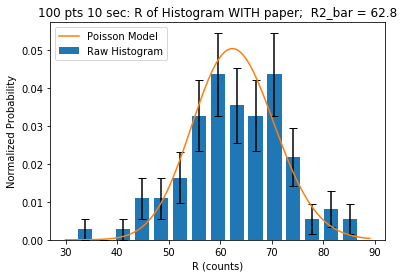

In [26]:
# without paper
# plot histogram
offset = 2
#bins = np.arange(np.min(R2) - offset, np.max(R2) + offset) - 0.5
bins = 15


# add the error bars
counts, bins, patches = plt.hist(R2, bins=bins, density=True, rwidth=0.75, label="Raw Histogram")
counts_err = np.sqrt(counts) / np.sqrt(t2.shape * np.diff(bins)) 

bcenter = (bins[:-1] + bins[1:]) / 2
plt.errorbar(bcenter, counts, yerr=counts_err, fmt='ko', markersize=0, capsize=4)

x_n_dist = np.linspace(np.min(R2) - offset, np.max(R2) + offset, 1000)
#pdf = norm.pdf(x_n_dist, loc=mean1, scale=stdev1) # this is for gaussian
pdf = np.exp(-mean2)*np.power(mean2, x_n_dist)/factorial(x_n_dist)

plt.plot(x_n_dist, pdf, label="Poisson Model");

# Now label your graph
plt.title(f'{m} pts {t_length} sec: R of Histogram WITH paper;  R2_bar = {mean2:.3}')
plt.xlabel('R (counts)')
plt.ylabel('Normalized Probability')
plt.legend()
plt.show()
